# Salary_hike -> Build a prediction model for Salary_hike

In [12]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
salary=pd.read_csv("Downloads/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [10]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Plots and log transformation of columns

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

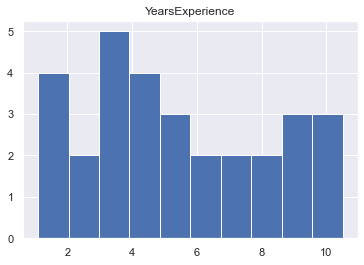

In [13]:
salary.hist("YearsExperience")

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

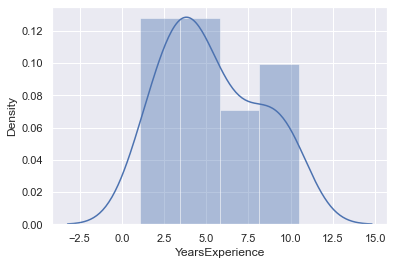

In [14]:
sns.distplot(salary['YearsExperience'])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

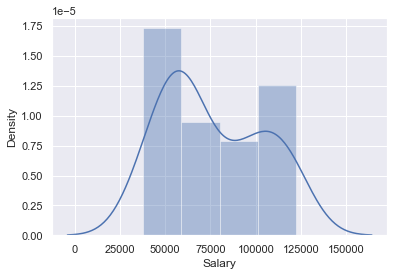

In [15]:
sns.distplot(salary["Salary"])

In [16]:
salary["log_Salary"]=np.log(salary["Salary"])

In [17]:
salary["log_YearsExperience"]=np.log(salary["YearsExperience"])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Salary', ylabel='Density'>

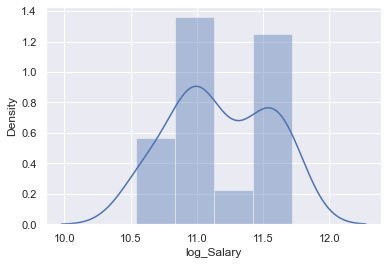

In [18]:
sns.distplot(salary["log_Salary"])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_YearsExperience', ylabel='Density'>

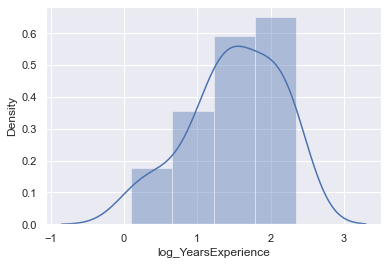

In [19]:
sns.distplot(salary["log_YearsExperience"])

In [20]:
salary.head()

,YearsExperience,Salary,log_Salary,log_YearsExperience
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

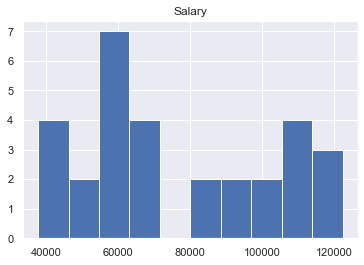

In [23]:
salary.hist("Salary")

array([[<AxesSubplot:title={'center':'log_Salary'}>]], dtype=object)

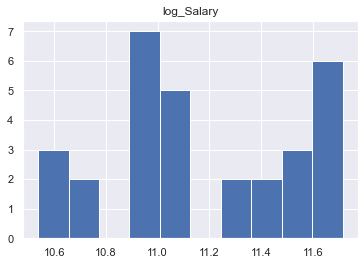

In [24]:
salary.hist("log_Salary")

array([[<AxesSubplot:title={'center':'YearsExperience'}>]], dtype=object)

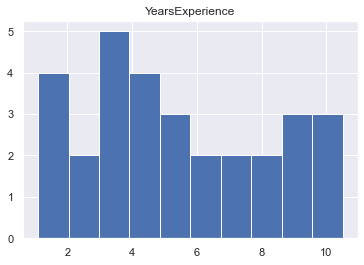

In [25]:
salary.hist("YearsExperience")

array([[<AxesSubplot:title={'center':'log_YearsExperience'}>]],
      dtype=object)

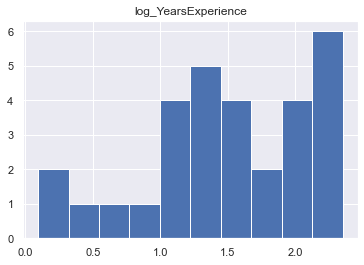

In [26]:
salary.hist("log_YearsExperience")

## Regression Model

In [27]:
log_model=smf.ols("log_Salary~log_YearsExperience", data=salary).fit()

In [28]:
normal_model=smf.ols("Salary~YearsExperience",data=salary).fit()

eval_env: 1


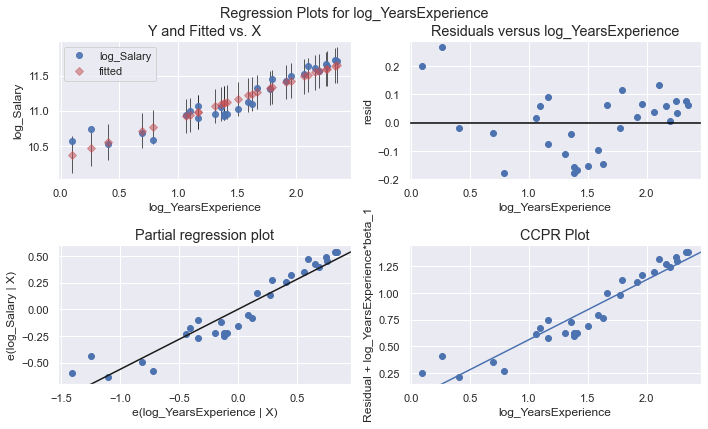

In [29]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(log_model,"log_YearsExperience", fig=fig)

eval_env: 1


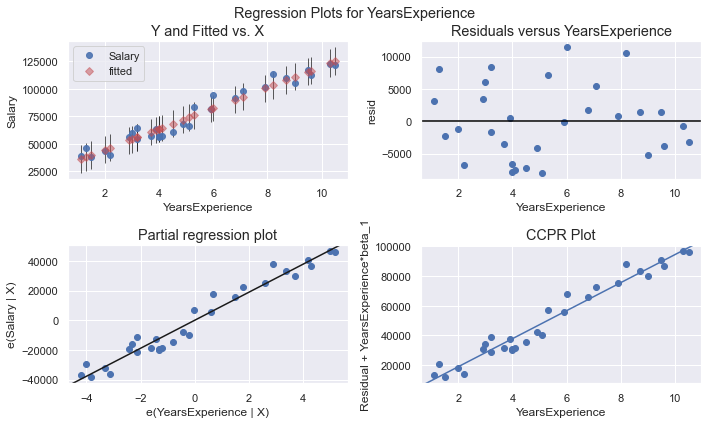

In [30]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(normal_model,"YearsExperience", fig=fig)

In [31]:
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [32]:
normal_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
Accuracy=log_model.rsquared
Accuracy

0.905215072581715

In [34]:
Accuracy1=normal_model.rsquared
Accuracy1

0.9569566641435086

In [35]:
normal_model.rsquared_adj

0.9554194021486339

In [36]:
log_model.rsquared_adj

0.9018298966024905

## Conclusion

In [37]:
print("This model can Predict salary for experience in range:", (salary["YearsExperience"].min(), salary["YearsExperience"].max())," years With Accuracy of ", Accuracy*100,"%" )
newdata=pd.Series([float(input("Enter your Experience : "))])
data_predict=pd.DataFrame(newdata, columns=["YearsExperience"])
Nsalary=normal_model.predict(data_predict)
print("Based on yor Experience your Expected salary is: ", (Nsalary.values)[0])

This model can Predict salary for experience in range: (1.1, 10.5)  years With Accuracy of  90.5215072581715 %
Enter your Experience : 5
Based on yor Experience your Expected salary is:  73042.01180594409
